<a href="https://colab.research.google.com/github/Juanfer1991/Automatic-Topic-Classification-Using-NLP-Topic-Models/blob/master/Climate_transition_risk_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**TOPSIS method**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Libraries

In [ ]:
!pip install scikit-fuzzy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skfuzzy as fuzz
import pandas as pd
from random import seed
from random import random
import math
import sys

from google.colab import drive

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 27.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894073 sha256=9ac356221a473c7ca88d6843f18980b602227bed9d1f9814ab9947830031f339
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


## Import data

In [ ]:
dataset_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Doctorado EIA/AVANCES_Enero 2022/1. Fuzzy Logic/respuestas expertos google.csv',delimiter=';')

In [ ]:
#limpiamos los datos donde hay na, ya que no los necesitamos
df_clean = dataset_test.dropna(axis=1, how='all')
df_clean

,Marca temporal,"En una escala de 1 a 5, siendo 1 nada importante y 5 muy importante, valore cada uno de los siguientes criterios según el nivel de importancia que considere que tiene cada uno de ellos a la hora de analizar los riesgos de la transición climática en una organización del sector manufacturero. [Vulnerabilidad]","En una escala de 1 a 5, siendo 1 nada importante y 5 muy importante, valore cada uno de los siguientes criterios según el nivel de importancia que considere que tiene cada uno de ellos a la hora de analizar los riesgos de la transición climática en una organización del sector manufacturero. [Resiliencia]","En una escala de 1 a 5, siendo 1 nada importante y 5 muy importante, valore cada uno de los siguientes criterios según el nivel de importancia que considere que tiene cada uno de ellos a la hora de analizar los riesgos de la transición climática en una organización del sector manufacturero. [Exposición]","En una escala de 1 a 5, siendo 1 nada importante y 5 muy importante, valore cada uno de los siguientes criterios según el nivel de importancia que considere que tiene cada uno de ellos a la hora de analizar los riesgos de la transición climática en una organización del sector manufacturero. [Probabilidad]","En una escala de 1 a 5, siendo 1 nada importante y 5 muy importante, valore cada uno de los siguientes criterios según el nivel de importancia que considere que tiene cada uno de ellos a la hora de analizar los riesgos de la transición climática en una organización del sector manufacturero. [Impacto]","Por favor, clasifique los siguientes criterios de evaluación por orden de importancia a la hora de analizar los riesgos de la transición climática en una organización del sector manufacturero, siendo la primera posición la más importante y la última la menos importante. [Vulnerabilidad]","Por favor, clasifique los siguientes criterios de evaluación por orden de importancia a la hora de analizar los riesgos de la transición climática en una organización del sector manufacturero, siendo la primera posición la más importante y la última la menos importante. [Resiliencia]","Por favor, clasifique los siguientes criterios de evaluación por orden de importancia a la hora de analizar los riesgos de la transición climática en una organización del sector manufacturero, siendo la primera posición la más importante y la última la menos importante. [Exposición]","Por favor, clasifique los siguientes criterios de evaluación por orden de importancia a la hora de analizar los riesgos de la transición climática en una organización del sector manufacturero, siendo la primera posición la más importante y la última la menos importante. [Probabilidad]",...,"Noticias y comentarios negativos sobre la empresa: las noticias sobre responsabilidad medioambiental pueden aumentar el valor para el accionista, mientras que la información negativa sobre la responsabilidad medioambiental de una empresa puede afectar negativamente a su valor para el accionista. [¿Qué tan resiliente puede ser la organización a este riesgo?]","Noticias y comentarios negativos sobre la empresa: las noticias sobre responsabilidad medioambiental pueden aumentar el valor para el accionista, mientras que la información negativa sobre la responsabilidad medioambiental de una empresa puede afectar negativamente a su valor para el accionista. [¿Qué tan expuesta puede estar la organización a este riesgo?]","Noticias y comentarios negativos sobre la empresa: las noticias sobre responsabilidad medioambiental pueden aumentar el valor para el accionista, mientras que la información negativa sobre la responsabilidad medioambiental de una empresa puede afectar negativamente a su valor para el accionista. [¿Qué probabilidad hay de que este riesgo se materialice en la organización?]","Noticias y comentarios negativos sobre la empresa: las noticias sobre responsabilidad medioambiental pueden aumentar el valor para el accionista, mientras que la información negativa sobre

In [ ]:
df_clean.shape

(8, 92)

In [ ]:
#acá obtenemos el dataframe de donde se obtienen los criterios
df_criteria = df_clean.iloc[:,1:11]
df_criteria

,"En una escala de 1 a 5, siendo 1 nada importante y 5 muy importante, valore cada uno de los siguientes criterios según el nivel de importancia que considere que tiene cada uno de ellos a la hora de analizar los riesgos de la transición climática en una organización del sector manufacturero. [Vulnerabilidad]","En una escala de 1 a 5, siendo 1 nada importante y 5 muy importante, valore cada uno de los siguientes criterios según el nivel de importancia que considere que tiene cada uno de ellos a la hora de analizar los riesgos de la transición climática en una organización del sector manufacturero. [Resiliencia]","En una escala de 1 a 5, siendo 1 nada importante y 5 muy importante, valore cada uno de los siguientes criterios según el nivel de importancia que considere que tiene cada uno de ellos a la hora de analizar los riesgos de la transición climática en una organización del sector manufacturero. [Exposición]","En una escala de 1 a 5, siendo 1 nada importante y 5 muy importante, valore cada uno de los siguientes criterios según el nivel de importancia que considere que tiene cada uno de ellos a la hora de analizar los riesgos de la transición climática en una organización del sector manufacturero. [Probabilidad]","En una escala de 1 a 5, siendo 1 nada importante y 5 muy importante, valore cada uno de los siguientes criterios según el nivel de importancia que considere que tiene cada uno de ellos a la hora de analizar los riesgos de la transición climática en una organización del sector manufacturero. [Impacto]","Por favor, clasifique los siguientes criterios de evaluación por orden de importancia a la hora de analizar los riesgos de la transición climática en una organización del sector manufacturero, siendo la primera posición la más importante y la última la menos importante. [Vulnerabilidad]","Por favor, clasifique los siguientes criterios de evaluación por orden de importancia a la hora de analizar los riesgos de la transición climática en una organización del sector manufacturero, siendo la primera posición la más importante y la última la menos importante. [Resiliencia]","Por favor, clasifique los siguientes criterios de evaluación por orden de importancia a la hora de analizar los riesgos de la transición climática en una organización del sector manufacturero, siendo la primera posición la más importante y la última la menos importante. [Exposición]","Por favor, clasifique los siguientes criterios de evaluación por orden de importancia a la hora de analizar los riesgos de la transición climática en una organización del sector manufacturero, siendo la primera posición la más importante y la última la menos importante. [Probabilidad]","Por favor, clasifique los siguientes criterios de evaluación por orden de importancia a la hora de analizar los riesgos de la transición climática en una organización del sector manufacturero, siendo la primera posición la más importante y la última la menos importante. [Impacto]"
0,5=muy importante,5=muy importante,5=muy importante,5=muy importante,5=muy importante,Posición 5,Posición 4,Posición 2,Posición 3,Posición 1
1,5=muy importante,4= importante,3=moderadamente importante,2= poco importante,4= importante,Posición 1,Posición 3,Posición 4,Posición 5,Posición 2
2,4= importante,5=muy importante,4= importante,3=moderadamente importante,4= importante,Posición 3,Posición 4,Posición 5,Posición 2,Posición 1
3,5=muy importante,3=moderadamente importante,5=muy importante,4= importante,5=muy importante,Posición 3,Posición 4,Posición 1,Posición 5,Posición 2
4,3=moderadamente importante,4= importante,5=muy importante,4= importante,5=muy importante,Posición 1,Posición 4,Posición 3,Posición 5,Posición 2
5,4= importante,4= importante,4= importante,4= importante,5=muy importante,Posición 3,Posición 4,Posición 1,Posición 5,Posición 2
6,3=moderadamente importante,4= importante,3=moderadamente importante,4= importante,5=muy importante,Posición 5,Posición 2,Posición 3,Posición 4,Posición 1
7,5=muy impo

In [ ]:
#acá obtenemos el df que usaremos para el topsis, con el analisis de las variables
df_topsis = df_clean.iloc[:,11:-1]
df_topsis

,Esquemas Cap and Trade: los sistemas de límites máximos y comercio de derechos de emisión son sistemas en los que las empresas pueden comerciar con sus emisiones. [¿Qué tan vulnerable puede ser la organización a este riesgo?],Esquemas Cap and Trade: los sistemas de límites máximos y comercio de derechos de emisión son sistemas en los que las empresas pueden comerciar con sus emisiones. [¿Qué tan resiliente puede ser la organización a este riesgo?],Esquemas Cap and Trade: los sistemas de límites máximos y comercio de derechos de emisión son sistemas en los que las empresas pueden comerciar con sus emisiones. [¿Qué tan expuesta puede estar la organización a este riesgo?],Esquemas Cap and Trade: los sistemas de límites máximos y comercio de derechos de emisión son sistemas en los que las empresas pueden comerciar con sus emisiones. [¿Qué probabilidad hay de que este riesgo se materialice en la organización?],Esquemas Cap and Trade: los sistemas de límites máximos y comercio de derechos de emisión son sistemas en los que las empresas pueden comerciar con sus emisiones. [¿Cuál sería el nivel de impacto que tendría este riesgo en la organización?],Aumento del impuesto sobre el carbono: estrategia regulatoria para reducir las emisiones de gases de efecto invernadero producidas por las empresas [¿Qué tan vulnerable puede ser la organización a este riesgo?],Aumento del impuesto sobre el carbono: estrategia regulatoria para reducir las emisiones de gases de efecto invernadero producidas por las empresas [¿Qué tan resiliente puede ser la organización a este riesgo?],Aumento del impuesto sobre el carbono: estrategia regulatoria para reducir las emisiones de gases de efecto invernadero producidas por las empresas [¿Qué tan expuesta puede estar la organización a este riesgo?],Aumento del impuesto sobre el carbono: estrategia regulatoria para reducir las emisiones de gases de efecto invernadero producidas por las empresas [¿Qué probabilidad hay de que este riesgo se materialice en la organización?],Aumento del impuesto sobre el carbono: estrategia regulatoria para reducir las emisiones de gases de efecto invernadero producidas por las empresas [¿Cuál sería el nivel de impacto que tendría este riesgo en la organización?],...,"Noticias y comentarios negativos sobre la empresa: las noticias sobre responsabilidad medioambiental pueden aumentar el valor para el accionista, mientras que la información negativa sobre la responsabilidad medioambiental de una empresa puede afectar negativamente a su valor para el accionista. [¿Qué tan vulnerable puede ser la organización a este riesgo?]","Noticias y comentarios negativos sobre la empresa: las noticias sobre responsabilidad medioambiental pueden aumentar el valor para el accionista, mientras que la información negativa sobre la responsabilidad medioambiental de una empresa puede afectar negativamente a su valor para el accionista. [¿Qué tan resiliente puede ser la organización a este riesgo?]","Noticias y comentarios negativos sobre la empresa: las noticias sobre responsabilidad medioambiental pueden aumentar el valor para el accionista, mientras que la información negativa sobre la responsabilidad medioambiental de una empresa puede afectar negativamente a su valor para el accionista. [¿Qué tan expuesta puede estar la organización a este riesgo?]","Noticias y comentarios negativos sobre la empresa: las noticias sobre responsabilidad medioambiental pueden aumentar el valor para el accionista, mientras que la información negativa sobre la responsabilidad medioambiental de una empresa puede afectar negativamente a su valor para el accionista. [¿Qué probabilidad hay de que este riesgo se materialice en la organización?]","Noticias y comentarios negativos sobre la empresa: las noticias sobre responsabilidad medioambiental pueden aumentar el valor para el accionista, mientras que la información negativa sobre la responsabilidad medioambiental de una empresa puede afectar negativamente a su valor para el a

## Criteria selection

In [ ]:
def get_individual_answer_criteria(df_row):
  """
  Este metodo, coge una fila del dataframe de criterios y lo transforma, dando como resultado un diccionario con los scores de cada criterio
  para calcular los scores se tiene en cuenta tanto la importancia individual que le dio cada uno de los expertos a los criterios, como el orden
  en el pusieron los criterios de acuerdo a su importancia. Se asignan puntos de acuerdo a la posición en el ranking del experto, de 1 a 5, siendo 5
  para el primer puesto, y 1 para el último.

  por ejemplo, un experto x consideró que la resiliencia tiene una importancia moderada (que equivale a 3), y su ranking de importancia fue:
  impacto, probabilidad, exposición, resiliencia y vulnerabilidad. En este caso la resiliencia es el cuarto valor mas importante, por lo tanto se le asigna
  una puntuación de 2 en el ranking.

  Sumando el valor de la importancia (3) co el valor del ranking (2), el experto x asignó a la resiliencia un score de 5 (3+2)
  """
  criteria_list= df_row.to_list()

  # se separan las respuestas y los rankings en variables distintas
  criteria_importances = criteria_list[:5]


  criteria_rank = criteria_list[5:10]


  criteria_rank_dict = {}
  #se suman las calificaciones individuales a los rankings para obtener el score total,
  criteria_rank_dict['vulnerability'] = int(criteria_importances[0][0]) + 6 - int(criteria_rank[0][-1])
  criteria_rank_dict['resilience'] = int(criteria_importances[1][0]) + 6 - int(criteria_rank[1][-1])
  criteria_rank_dict['exposure'] = int(criteria_importances[2][0]) + 6 - int(criteria_rank[2][-1])
  criteria_rank_dict['likelihood'] = int(criteria_importances[3][0]) + 6 - int(criteria_rank[3][-1])
  criteria_rank_dict['impact'] = int(criteria_importances[4][0]) + 6 - int(criteria_rank[4][-1])

  return criteria_rank_dict

In [ ]:
def get_criteria_weights(criteria_score_dict):
  """
  en este metodo se toma la suma de los scores de todas las respuestas, y se dividen sobre el total,
  dando como resultados los pesos que se utilizarán para topsis
  """
  # se calcula el denominador para obtener el peso relativo al total de los scores
  denominator = (criteria_score_dict['vulnerability'] +
                 criteria_score_dict['resilience'] +
                 criteria_score_dict['exposure'] +
                 criteria_score_dict['likelihood'] +
                 criteria_score_dict['impact'] )
  print(denominator)
  #se pone en un nuevo diccionario los pesos relativos a los scores, haciendo el valor del score sobre el total definitivo
  weights_dict = {}
  for key,value in criteria_score_dict.items():
    weights_dict[key] = value/denominator

  return weights_dict


In [ ]:
def get_scores_in_df(df):
  """
  en este metodo se obtiene un df con todos los scores de los expertos, para posteriormente sacar los pesos
  """
  criteria_scores_list = []
  #se itera el n numero de expertos para obtener n diccionarios con los scores de los criterios, se almacenan en un df
  for i in range(df.shape[0]):
    criteria_row = df.loc[i]
    score = get_individual_answer_criteria(criteria_row)
    criteria_scores_list.append(score)
  df_scores = pd.DataFrame(criteria_scores_list)
  return df_scores


In [ ]:
df_criteria_scores = get_scores_in_df(df_criteria)
df_criteria_scores

,vulnerability,resilience,exposure,likelihood,impact
0,6,7,9,8,10
1,10,7,5,3,8
2,7,7,5,7,9
3,8,5,10,5,9
4,8,6,8,5,9
5,7,6,9,5,9
6,4,8,6,6,10
7,10,6,6,4,7


In [ ]:
"""
Se sacan los pesos de cada criterio para usar en el topsis
"""
df_criteria_scores = get_scores_in_df(df_criteria)
#se suma el score de cada experto por criterio, para posteriormente sacar los pesos
total_criteria_scores = df_criteria_scores.sum().to_dict()
print(total_criteria_scores)
criteria_weights = get_criteria_weights(total_criteria_scores)
criteria_weights

{'vulnerability': 60, 'resilience': 52, 'exposure': 58, 'likelihood': 43, 'impact': 71}
284


{'vulnerability': 0.2112676056338028,
 'resilience': 0.18309859154929578,
 'exposure': 0.20422535211267606,
 'likelihood': 0.15140845070422534,
 'impact': 0.25}

## Topsis

In [ ]:
w = criteria_weights

In [ ]:
def get_individual_answer_df(df_row):
  """
  Obtenemos un dataframe por experto, en el cual almacenamos la información relacionada con las variables
  Para posteriormente realizar el calculo de topsis, esta parte es procesamiento y limpieza
  """
  answer_list = df_row.to_list()
  categories = 5
  number_of_variables = int(len(answer_list)/categories)

  clean_list = []

  #se itera segun el numero de variables para obtener la respuesta de cada experto a cada uno de los criterios
  #como se sabe que son 5 criterios, y se sabe el orden de las variables en el csv de la encuesta, se puede procesar y separar las respuestas que están
  # en un arreglo para ponerlas en una matriz
  for x in range(number_of_variables):
    answer_dict = {
        'vulnerability': int(answer_list[(x*5)][0]),
        'resilience': int(answer_list[(x*5)+1][0]),
        'exposure': int(answer_list[(x*5)+2][0]),
        'likelihood': int(answer_list[(x*5)+3][0]),
        'impact': int(answer_list[(x*5)+4][0]),
    }
    clean_list.append(answer_dict)
  df = pd.DataFrame(clean_list)
  return df

NOTA: hay variables positivas y variables negativas:

Por ejemplo, una calificación alta de vulnerabilidad es algo negativo, pero una calificación alta de resiliencia es algo positivo

In [ ]:
def euclidean_distance(x,dist_dict):
  """
  Distancia euclediana,tanto para el mejor ideal y el peor ideal
  """
  #se calcula la distancia euclidiana para cada uno de los criterios
  s_vulnerability = math.pow(x['vulnerability_n'] - dist_dict['v'],2)
  s_resilience = math.pow(x['resilience_n'] - dist_dict['r'],2)
  s_exposition = math.pow(x['exposure_n'] - dist_dict['e'],2)
  s_likelihood = math.pow(x['likelihood_n'] - dist_dict['l'],2)
  s_impact = math.pow(x['impact_n'] - dist_dict['i'],2)

  return math.sqrt(s_vulnerability+s_resilience+s_exposition+s_likelihood+s_impact)

In [ ]:
def calculate_topsis(df,weights):

  """
  Calculo de topsis: se realiza el calculo de topsis para determinar el performance de cada uno de las variables
  según la respuesta de 1 experto. Recibe como parametro la tabla de respuestas de un experto

  """

  #se obtiene el denominador de cada criterio para normalizar la matriz de respuestas
  denominator_vulnerability = math.sqrt(df['vulnerability'].pow(2).sum())
  denominator_resilience = math.sqrt(df['resilience'].pow(2).sum())
  denominator_exposition = math.sqrt(df['exposure'].pow(2).sum())
  denominator_likelihood = math.sqrt(df['likelihood'].pow(2).sum())
  denominator_impact = math.sqrt(df['impact'].pow(2).sum())

  #Se realiza la normalización de puntuaciones
  df['vulnerability_n'] = df['vulnerability'] / denominator_vulnerability * weights['vulnerability']
  df['resilience_n'] = df['resilience'] / denominator_resilience * weights['resilience']
  df['exposure_n'] = df['exposure'] / denominator_exposition * weights['exposure']
  df['likelihood_n'] = df['likelihood'] / denominator_likelihood * weights['likelihood']
  df['impact_n'] = df['impact'] / denominator_impact * weights['impact']


  #los ideales son la peor y mejor calificacion que se obtuvo en cada una de las categorías, y se utiliza para obtener la distancia euclediana de cada
  #una de las calificaciones al peor y mejor ideal respectivamente

  #vulnerability ideals
  vulnerability_best = df['vulnerability_n'].max()
  vulnerability_worst = df['vulnerability_n'].min()

  #resilience ideals
  resilience_best = df['resilience_n'].min()
  resilience_worst = df['resilience_n'].max()

  #exposition ideals
  exposition_best = df['exposure_n'].max()
  exposition_worst = df['exposure_n'].min()

  #likelihood ideals
  likelihood_best = df['likelihood_n'].max()
  likelihood_worst = df['likelihood_n'].min()

  #impact ideals
  impact_best = df['impact_n'].max()
  impact_worst = df['impact_n'].min()

  dict_best = {
      'v':resilience_best,
      'r':resilience_best,
      'e':exposition_best,
      'l':likelihood_best,
      'i':impact_best
  }

  dict_worst = {
      'v':resilience_worst,
      'r':resilience_worst,
      'e':exposition_worst,
      'l':likelihood_worst,
      'i':impact_worst
  }

  #se calcula la distancia euclediana de cada uno de los valores con el respectivo ideal mejor e ideal peor
  df['euclidean_best'] = df.apply(lambda x: euclidean_distance(x,dict_best),axis =1)
  df['euclidean_worst'] = df.apply(lambda x: euclidean_distance(x,dict_worst),axis =1)

  #se efectua el calculo del performance dividiendo la distancia euclediana negativa sobre la suma de la positiva mas la negativa.
  df['performance'] = df.apply(lambda x: x['euclidean_worst']/(x['euclidean_best']+x['euclidean_worst']),axis = 1)

  return df

In [ ]:
def normalize_old_answers(df):
  #debido a un cambio en la encuesta, las primeras 2 preguntas tienen menos opciones, por lo que debemos de normalizarlas.
  df['vulnerability'] = df['vulnerability'].apply(lambda x: x*5/4)
  df['resilience'] = df['resilience'].apply(lambda x: x*5/4)
  df['exposure'] = df['exposure'].apply(lambda x: x*5/4)
  df['likelihood'] = df['likelihood'].apply(lambda x: x*5/4)
  df['impact'] = df['impact'].apply(lambda x: x*5/4)

  return df

In [ ]:
def get_all_topsis_answers(df):
  """
  se ponen en un arreglo todos los dataframes de respuestas de cada uno de los n expertoes en una matriz de tamaño n
  """
  topsis_performances_list = []
  for i in range(df.shape[0]):

    topsis_row = df.loc[i]
    topsis_ind_answer_df = get_individual_answer_df(topsis_row)
    if i == 0 or i == 1:
      topsis_ind_answer_df = normalize_old_answers(topsis_ind_answer_df)
    topsis_ind_performance_df = calculate_topsis(topsis_ind_answer_df,w)
    topsis_performances_list.append(topsis_ind_performance_df)

  return topsis_performances_list

SAMPLE ANSWER

In [ ]:
#aca se puede divisar cada una de las respuestas de los expertos por separado, si se quisiera hacer un análisis mas detallado de cada respuesta individual
topsis_test_answer_list = get_all_topsis_answers(df_topsis)
topsis_test_answer_list[1]

,vulnerability,resilience,exposure,likelihood,impact,vulnerability_n,resilience_n,exposure_n,likelihood_n,impact_n,euclidean_best,euclidean_worst,performance
0,3.75,2.50,5.00,2.50,3.75,0.054549,0.033569,0.074573,0.029837,0.065779,0.042558,0.046587,0.522598
1,2.50,3.75,2.50,2.50,3.75,0.036366,0.050354,0.037286,0.029837,0.065779,0.055235,0.026008,0.320130
2,5.00,2.50,3.75,2.50,5.00,0.072732,0.033569,0.055929,0.029837,0.087706,0.052646,0.055255,0.512093
3,2.50,3.75,2.50,2.50,2.50,0.036366,0.050354,0.037286,0.029837,0.043853,0.067031,0.013988,0.172649
4,3.75,3.75,3.75,5.00,3.75,0.054549,0.050354,0.055929,0.059675,0.065779,0.039373,0.041668,0.514160
5,2.50,3.75,3.75,3.75,3.75,0.036366,0.050354,0.055929,0.044756,0.065779,0.036612,0.035307,0.490924
6,5.00,2.50,3.75,3.75,3.75,0.072732,0.033569,0.055929,0.044756,0.065779,0.050839,0.042818,0.457180
7,3.75,3.75,2.50,2.50,2.50,0.054549,0.050354,0.037286,0.029837,0.043853,0.070182,0.004195,0.056404
8,3.75,2.50,5.00,3.75,5.00,0.054549,0.033569,0.074573,0.044756,0.087706,0.025743,0.061929,0.706369
9,5.00,2.50,5.00,5.00,5.00,0.072732,0.033569,0.074573,0.059675,0.087706,0.039163,0.070612,0.643246


CONSOLIDAR INFORMACIÓN

In [ ]:
#creamos el df que se usará en fuzzy asignamos el nombre del riesgo y el codigo a un df
fuzzy_topsis_dict = {
 0: {'name': 'Esquemas de cap and trade', 'code': 'Rreg1'},
 1: {'name': 'Aumento del impuesto al carbono ', 'code': 'Rreg2'},
 2: {'name': 'Litigios relacionados con el cambio climático', 'code': 'Rreg3'},
 3: {'name': 'Obligación para reportar emisiones','code': 'Rreg4'},
 4: {'name': 'Cambio en patrones de producción de energía menos intensivas en carbono','code': 'RT1'},
 5: {'name': 'Avance tecnológico de las energías renovables y la eficiencia energética','code': 'RT2'},
 6: {'name': 'Cambio tecnológico (desarrollo de tecnología relacionada con el cambio climático)','code': 'RT3'},
 7: {'name': 'Inversiones fallidas en nuevas tecnologías para reducir las emisiones','code': 'RT4'},
 8: {'name': 'Cambio en las  demandas de productos y servicios','code': 'RM1'},
 9: {'name': 'Materias primas: volatilidad de precios y disponibilidad','code': 'RM2'},
 10: {'name': 'Preocupación de los stakeholders por el cambio climático','code': 'RM3'},
 11: {'name': 'Poca adaptación a los cambios en el comportamiento de los clientes','code': 'RM4'},
 12: {'name': 'Cambios en las preferencias de los consumidores ','code': 'Rrep1'},
 13: {'name': 'Presiones crecientes de organizaciones no gubernamentales','code': 'Rrep2'},
 14: {'name': 'Noticias y comentarios negativos hacia la empresa','code': 'Rrep3'},
 15: {'name': 'Cambios en el sentimiento del mercado inducidos por la conciencia de los riesgos climáticos futuros','code': 'Rrep4'},
}

fuzzy_topsis_df = pd.DataFrame(fuzzy_topsis_dict).T


In [ ]:
def get_average_answers(df_list):
  """
  Este metodo condensa todo lo calculado anteriormente en un df que contiene los valores de score, probabilidad e impacto de cada uno de los expertos
  de igual forma se obtiene el promedio de respuestas, y se normalizan los valores de probabilidad e impacto
  """
  codes_df = fuzzy_topsis_df.copy()
  answer = 0
  likelihood_columns_list = []
  impact_columns_list = []
  exposure_columns_list = []
  resilience_columns_list = []
  vulnerability_columns_list = []

  performance_columns_list = []
  for df in df_list:
    answer+=1
    # se guarda en las columnas las respuestas de cada experto
    df_clean = df[['likelihood','impact','exposure','resilience','vulnerability','performance']]
    codes_df['likelihood'+str(answer)] = df_clean['likelihood']
    codes_df['impact'+str(answer)] = df_clean['impact']
    codes_df['exposure'+str(answer)] = df_clean['exposure']
    codes_df['resilience'+str(answer)] = df_clean['resilience']
    codes_df['vulnerability'+str(answer)] = df_clean['vulnerability']

    codes_df['performance'+str(answer)] = df_clean['performance']

    likelihood_columns_list.append('likelihood'+str(answer))
    impact_columns_list.append('impact'+str(answer))
    exposure_columns_list.append('exposure'+str(answer))
    resilience_columns_list.append('resilience'+str(answer))
    vulnerability_columns_list.append('vulnerability'+str(answer))

    performance_columns_list.append('performance'+str(answer))

  # se calculan los promedios
  codes_df['likelihood_avg'] = codes_df[likelihood_columns_list].mean(axis=1)
  codes_df['impact_avg'] = codes_df[impact_columns_list].mean(axis=1)
  codes_df['exposure_avg'] = codes_df[exposure_columns_list].mean(axis=1)
  codes_df['resilience_avg'] = codes_df[resilience_columns_list].mean(axis=1)
  codes_df['vulnerability_avg'] = codes_df[vulnerability_columns_list].mean(axis=1)
  codes_df['performance_avg'] = codes_df[performance_columns_list].mean(axis=1)

  # se normalizan los valores
  codes_df['likelihood_n'] = (codes_df['likelihood_avg']-codes_df['likelihood_avg'].min())/(codes_df['likelihood_avg'].max()-codes_df['likelihood_avg'].min())
  codes_df['likelihood_n'] = codes_df['likelihood_n'].apply(lambda x: 0.2 if x < 0.2 else x)

  codes_df['impact_n'] = (codes_df['impact_avg'])/(codes_df['impact_avg'].max())
  codes_df['impact_n'] = codes_df['impact_n'].apply(lambda x: 0.2 if x <0.2 else x)


  return codes_df

In [ ]:
topsis_performances_list = get_all_topsis_answers(df_topsis)
fuzzy_topsis_df = get_average_answers(topsis_performances_list)
fuzzy_topsis_df[['name','code','vulnerability_avg','resilience_avg','exposure_avg','likelihood_avg','impact_avg','performance_avg']]
#fuzzy_topsis_df[['likelihood1', 'likelihood2', 'likelihood3', 'likelihood4', 'likelihood5', 'likelihood6', 'likelihood7', 'likelihood8','likelihood_avg']]

,name,code,vulnerability_avg,resilience_avg,exposure_avg,likelihood_avg,impact_avg,performance_avg
0,Esquemas de cap and trade,Rreg1,3.59375,3.28125,3.87500,3.56250,4.18750,0.524339
1,Aumento del impuesto al carbono,Rreg2,4.18750,3.31250,4.31250,4.15625,4.34375,0.518315
2,Litigios relacionados con el cambio climático,Rreg3,3.59375,3.12500,3.18750,3.00000,3.68750,0.449477
3,Obligación para reportar emisiones,Rreg4,3.12500,3.71875,3.81250,3.93750,3.37500,0.449048
4,Cambio en patrones de producción de energía me...,RT1,3.93750,3.15625,3.59375,4.34375,4.34375,0.515344
5,Avance tecnológico de las energías renovables ...,RT2,3.25000,3.56250,4.09375,3.68750,4.06250,0.519140
6,Cambio tecnológico (desarrollo de tecnología r...,RT3,4.25000,3.37500,3.93750,4.06250,4.21875,0.506397
7,Inversiones fallidas en nuevas tecnologías par...,RT4,3.56250,2.75000,3.40625,3.15625,3.68750,0.440551
8,Cambio en las demandas de productos y servicios,RM1,3.18750,2.75000,3.34375,3.28125,3.75000,0.502388
9,Materias primas: volatilidad de precios y disp...,RM2,4.75000,3.28125,4.50000,4.62500,4.46875,0.532809


# **Fuzzy Logic riesgos climáticos de transición**

## Variables and membership functions definition

In [ ]:
"""
  en esta seccion, generamos las funciones de pertenencia, con los conjuntos difusos, en este escenario estamos utilizando
  funciones trapezoidales para probabilidad, impacto y riesgo
"""
#likelihood tag
a_1=0.1 ; b_1=0.1 ; c_1=0.3
a_2=0.2 ; b_2=0.3 ; c_2=0.4; d_2=0.5
a_3=0.4; b_3=0.5; c_3=0.6;d_3=0.7
a_4=0.6; b_4=0.7; c_4=0.8;d_4=0.9
a_5=0.8;b_5 =1;c_5 = 1

Likelihood = np.arange(0 - 0.001, 1 + 0.001, 0.000001)
very_unlikely = fuzz.trimf(Likelihood, [a_1, b_1, c_1])
unlikely = fuzz.trapmf(Likelihood, [a_2, b_2, c_2, d_2])
neutral_likelihood = fuzz.trapmf(Likelihood, [a_3, b_3, c_3, d_3])
likely = fuzz.trapmf(Likelihood, [a_4, b_4, c_4, d_4])
very_likely = fuzz.trimf(Likelihood, [a_5, b_5, c_5])

#Impact tag
a_6=0.1 ; b_6=0.1 ; c_6=0.3
a_7=0.2 ; b_7=0.3 ; c_7=0.4; d_7=0.5
a_8=0.4; b_8=0.5; c_8=0.6;d_8=0.7
a_9=0.6; b_9=0.7; c_9=0.8;d_9=0.9
a_10=0.8;b_10 =1;c_10 = 1

Impact = np.arange(0 - 0.001, 1 + 0.001, 0.000001)
low_impact = fuzz.trimf(Impact, [a_6, b_6, c_6])
medium_low_impact = fuzz.trapmf(Impact, [a_7, b_7, c_7, d_7])
medium_impact = fuzz.trapmf(Impact, [a_8, b_8, c_8, d_8])
medium_high_impact = fuzz.trapmf(Impact, [a_9, b_9, c_9, d_9])
high_impact = fuzz.trimf(Impact, [a_10, b_10, c_10])

#Risk tag
a_11=0.1 ; b_11=0.1 ; c_11=0.4
a_12=0.2 ; b_12=0.3 ; c_12=0.5; d_12=0.6
a_13=0.4; b_13=0.5; c_13=0.7;d_13=0.8
a_14=0.6;b_14=1;c_14= 1
#a_14=0.8;b_14=1;c_14= 1


Risk = np.arange(0 - 0.001, 1 + 0.001, 0.000001)
low_risk = fuzz.trimf(Risk, [a_11, b_11, c_11])
medium_risk = fuzz.trapmf(Risk, [a_12, b_12, c_12, d_12])
high_risk = fuzz.trapmf(Risk, [a_13, b_13, c_13, d_13])
critical_risk = fuzz.trimf(Risk, [a_14, b_14, c_14])

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


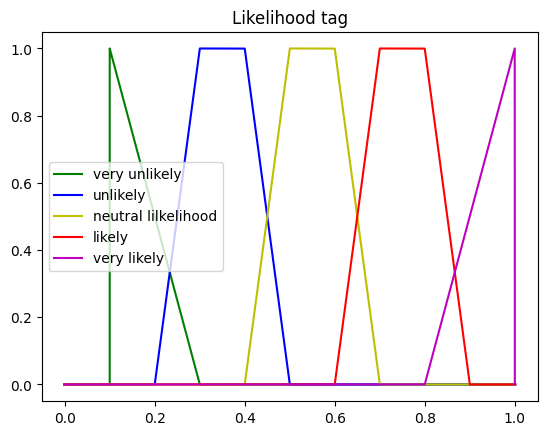

In [ ]:
#Grafica de funciones de pertenencia de probabilidad
# Probability tag
plt.plot(Likelihood, very_unlikely, 'g', linewidth=1.5, label='very unlikely')
plt.plot(Likelihood, unlikely, 'b', linewidth=1.5, label='unlikely')
plt.plot(Likelihood, neutral_likelihood, 'y', linewidth=1.5, label='neutral lilkelihood')
plt.plot(Likelihood, likely, 'r', linewidth=1.5, label='likely')
plt.plot(Likelihood, very_likely, 'm', linewidth=1.5, label='very likely')
plt.title('Likelihood tag')
plt.legend()
plt.show()

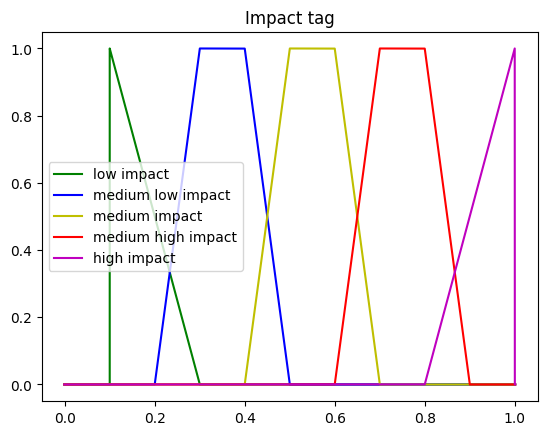

In [ ]:
#Grafica de funciones de pertenencia de probabilidad
# Impact tag
plt.plot(Impact, low_impact, 'g', linewidth=1.5, label='low impact')
plt.plot(Impact, medium_low_impact, 'b', linewidth=1.5, label='medium low impact')
plt.plot(Impact, medium_impact, 'y', linewidth=1.5, label='medium impact')
plt.plot(Impact, medium_high_impact, 'r', linewidth=1.5, label='medium high impact')
plt.plot(Impact, high_impact, 'm', linewidth=1.5, label='high impact')
plt.title('Impact tag')
plt.legend()
plt.show()

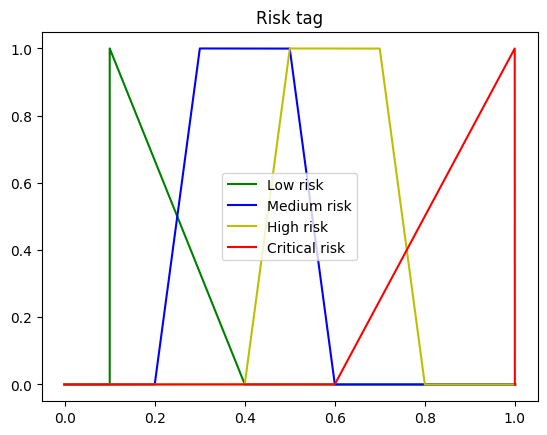

In [ ]:
#Grafica de funciones de pertenencia de probabilidad
# Risk tag
plt.plot(Risk, low_risk, 'g', linewidth=1.5, label='Low risk')
plt.plot(Risk, medium_risk, 'b', linewidth=1.5, label='Medium risk')
plt.plot(Risk, high_risk, 'y', linewidth=1.5, label='High risk')
plt.plot(Risk, critical_risk, 'r', linewidth=1.5, label='Critical risk')
plt.title('Risk tag')
plt.legend()
plt.show()

## Define the fuzzification functions for the input

In [ ]:
#En esta funcion se inscribe el valor nitido en la funcion de pertenencia, para obtener el conjunto difuso
#Likelihood fuzzy sets fuzzification
def FuzzifyLikelihood(LikelihoodVal, Likelihood, very_unlikely, unlikely, neutral_likelihood, likely, very_likely):
  fzz_likelihood = np.zeros(5)

  fzz_likelihood[0] = fuzz.interp_membership(Likelihood, very_unlikely, LikelihoodVal)
  fzz_likelihood[1] = fuzz.interp_membership(Likelihood, unlikely, LikelihoodVal)
  fzz_likelihood[2] = fuzz.interp_membership(Likelihood, neutral_likelihood, LikelihoodVal)
  fzz_likelihood[3] = fuzz.interp_membership(Likelihood, likely, LikelihoodVal)
  fzz_likelihood[4] = fuzz.interp_membership(Likelihood, very_likely, LikelihoodVal)

  return fzz_likelihood

#Impact sets fuzzification
def FuzzifyImpact(ImpactVal, Impact, low_impact, medium_low_impact, medium_impact,medium_high_impact,high_impact):
  fzz_Impact = np.zeros(5)

  fzz_Impact[0] = fuzz.interp_membership(Impact, low_impact, ImpactVal)
  fzz_Impact[1] = fuzz.interp_membership(Impact, medium_low_impact, ImpactVal)
  fzz_Impact[2] = fuzz.interp_membership(Impact, medium_impact, ImpactVal)
  fzz_Impact[3] = fuzz.interp_membership(Impact, medium_high_impact, ImpactVal)
  fzz_Impact[4] = fuzz.interp_membership(Impact, high_impact, ImpactVal)

  return fzz_Impact



In [ ]:
#Risk sets fuzzification
def FuzzifyRisk(RiskVal, Risk, low_risk, medium_risk, high_risk,critical_risk):
  fzz_risk = np.zeros(4)

  fzz_risk[0] = fuzz.interp_membership(Risk, low_risk, RiskVal)
  fzz_risk[1] = fuzz.interp_membership(Risk, medium_risk, RiskVal)
  fzz_risk[2] = fuzz.interp_membership(Risk, high_risk, RiskVal)
  fzz_risk[3] = fuzz.interp_membership(Risk, critical_risk, RiskVal)


  return fzz_risk

## Fuzzy rules construction

Para este paso, es necesario primero tener la información sobre las reglas, definir realmente que combinaciones posibles existen y cuales podrían ser sus resultados




In [ ]:
def evalRules(fuzzedLikelihood, fuzzedImpact):

  #se definen las reglas difusas, segun con lo que indica la literatura
  outVarS = np.zeros(5)

  # Rules1
  outVarS[0] = max(outVarS[0], min(fuzzedLikelihood[0], fuzzedImpact[0])) # rule1 IF very unlikely AND low impact THEN
  outVarS[0] = max(outVarS[0], min(fuzzedLikelihood[0], fuzzedImpact[1])) # rule2 IF very unlikely AND medium low impact THEN
  outVarS[0] = max(outVarS[0], min(fuzzedLikelihood[0], fuzzedImpact[2])) # rule3 IF very unlikely AND medium impact THEN
  outVarS[1] = max(outVarS[1], min(fuzzedLikelihood[0], fuzzedImpact[3])) # rule4 IF very unlikely AND medium high impact THEN
  outVarS[1] = max(outVarS[1], min(fuzzedLikelihood[0], fuzzedImpact[4])) # rule5 IF very unlikely AND high impact THEN

  outVarS[0] = max(outVarS[0], min(fuzzedLikelihood[1], fuzzedImpact[0])) # rule6 IF unlikely AND low impact THEN
  outVarS[0] = max(outVarS[0], min(fuzzedLikelihood[1], fuzzedImpact[1])) # rule7 IF unlikely AND medium low impact THEN
  outVarS[1] = max(outVarS[1], min(fuzzedLikelihood[1], fuzzedImpact[2])) # rule8 IF unlikely AND medium impact THEN Risk
  outVarS[1] = max(outVarS[1], min(fuzzedLikelihood[1], fuzzedImpact[3])) # rule9 IF unlikely AND medium high impact THEN
  outVarS[2] = max(outVarS[2], min(fuzzedLikelihood[1], fuzzedImpact[4])) # rule10 IF unlikely AND medium high THEN

  outVarS[0] = max(outVarS[0], min(fuzzedLikelihood[2], fuzzedImpact[0])) # rule11 IF neutral_likelihood AND low impact THEN
  outVarS[0] = max(outVarS[0], min(fuzzedLikelihood[2], fuzzedImpact[1])) # rule12 IF neutral_likelihood AND medium low impact THEN
  outVarS[1] = max(outVarS[1], min(fuzzedLikelihood[2], fuzzedImpact[2])) # rule13 IF neutral_likelihood AND medium impact THEN
  outVarS[2] = max(outVarS[2], min(fuzzedLikelihood[2], fuzzedImpact[3])) # rule14 IF neutral_likelihood AND medium high impact THEN
  outVarS[2] = max(outVarS[2], min(fuzzedLikelihood[2], fuzzedImpact[4])) # rule15 IF neutral_likelihood AND high impact THEN

  outVarS[0] = max(outVarS[0], min(fuzzedLikelihood[3], fuzzedImpact[0])) # rule16 IF likely AND low impact THEN
  outVarS[1] = max(outVarS[1], min(fuzzedLikelihood[3], fuzzedImpact[1])) # rule17 IF likely AND medium low impact THEN
  outVarS[1] = max(outVarS[1], min(fuzzedLikelihood[3], fuzzedImpact[2])) # rule18 IF likely AND medium impact THEN
  outVarS[2] = max(outVarS[2], min(fuzzedLikelihood[3], fuzzedImpact[3])) # rule19 IF likely AND medium high impact THEN
  outVarS[3] = max(outVarS[3], min(fuzzedLikelihood[3], fuzzedImpact[4])) # rule20 IF likely AND high impact THEN Risk

  outVarS[0] = max(outVarS[0], min(fuzzedLikelihood[4], fuzzedImpact[0])) # rule21 IF very likely AND low impact THEN
  outVarS[1] = max(outVarS[1], min(fuzzedLikelihood[4], fuzzedImpact[1])) # rule22 IF very likely AND medium low impact THEN
  outVarS[2] = max(outVarS[2], min(fuzzedLikelihood[4], fuzzedImpact[2])) # rule23 IF very likely AND medium impact THEN
  outVarS[3] = max(outVarS[3], min(fuzzedLikelihood[4], fuzzedImpact[3])) # rule24 IF very likely AND medium high impact THEN
  outVarS[3] = max(outVarS[3], min(fuzzedLikelihood[4], fuzzedImpact[4])) # rule25 IF very likely AND high impact THEN

  return outVarS

def setOutMFs(outRuleVars, Risk,Low, Medium, High,Critical):

  low_max = np.full(np.shape(Risk),outRuleVars[0])
  medium_max = np.full(np.shape(Risk),outRuleVars[1])
  high_max = np.full(np.shape(Risk),outRuleVars[2])
  critical_max = np.full(np.shape(Risk),outRuleVars[3])

  out_low = np.fmin(low_max, Low)
  out_medium = np.fmin(medium_max, Medium)
  out_high = np.fmin(high_max, High)
  out_critical = np.fmin(critical_max, Critical)

  Out_mfs = np.stack((out_low,out_medium, out_high, out_critical))

  return Out_mfs

## Obtain output MF combinations

*   **execFzzedRules** evalúa todo el sistema utilizando entradas numéricas y fuzzificación. Entrada, los 2 valores float de cada variable de entrada, por ejemplo, la puntuación de la calidad y el servicio entre 0-1. Salida, la punta, float 0-25.
*   **execLingRules** evalúa todo el sistema utilizando variables lingüísticas con funciones de membresía de tamaño variable (por ejemplo, de una encuesta o cotejo de datos). Introduce los grados de pertenencia de cada MF para cada variable lingüística (por ejemplo, 2 x 5 flotantes correspondientes a los MF de adoption y time)

In [ ]:
def execFzzedRules(scoreLikelihood, scoreImpact):

  # Fuzzyfy the 2 scores in each of its linguistic variables
  fzzedLikelihood = FuzzifyLikelihood(scoreLikelihood, Likelihood, very_unlikely, unlikely, neutral_likelihood,likely,very_likely)
  fzzedImpact = FuzzifyImpact(scoreImpact, Impact, low_impact, medium_low_impact, medium_impact, medium_high_impact,high_impact)

  # Evalate the rules and get the resulting degrees of membership for the output MFs
  EvaledRs = evalRules(fzzedLikelihood, fzzedImpact)
  outMFs = setOutMFs(EvaledRs, Risk, low_risk, medium_risk, high_risk, critical_risk)


  # Agregate the sets into a single one for defuzzification (i.e. get the Union {OR} of them)
  outTempMF =  fuzz.fuzzy_or(Risk, outMFs[0], Risk, outMFs[1])
  outTempMF2 =  fuzz.fuzzy_or(Risk, outTempMF[1], Risk, outMFs[2])
  outTotalMF =  fuzz.fuzzy_or(Risk, outTempMF2[1], Risk, outMFs[3])

  # defuzzify to the get crisp output value.

  fIndicator = fuzz.defuzz(outTotalMF[0], outTotalMF[1],'centroid')


  #plt.plot(outTotalMF[0], outTotalMF[1], 'r', linewidth=3, label='Final aggregated MFs')
  #plt.plot([fIndicator,fIndicator], [0, 1], 'g', linewidth=1.5, label='Defuzz Result')
  #plt.title('Aggregated MFs')
  #plt.legend()
  #plt.show()

  return fIndicator



In [ ]:
def obtain_risk_tag(x):
  #Se obtiene una categoria para el riesgo de acuerdo con el resultado nitido que se obtuvo en el proceso fuzzy
  risk_membership_list = FuzzifyRisk(x,Risk,low_risk,medium_risk,high_risk,critical_risk)
  index = np.argmax(risk_membership_list)
  tag_list = ['Riesgo Bajo', 'Riesgo Medio', 'Riesgo Alto', 'Riesgo Crítico'] #español
  #tag_list = ['Low Risk', 'Medium Risk', 'High Risk', 'Critical Risk'] #ingles

  return tag_list[int(index)]

def obtain_likelihood_tag(x):
  #se obtiene la categoria que mas representa la probabilidad
  likelihood_membership_list = FuzzifyLikelihood(x, Likelihood, very_unlikely, unlikely, neutral_likelihood,likely,very_likely)
  index = np.argmax(likelihood_membership_list)
  tag_list = ['Muy Improbable','Improbable','Probabilidad Media', 'Probable','Muy Probable'] #español
  #tag_list = ['Very Unlikely','Unlikely','Medium Likelihood', 'Likely','Very Likely'] #ingles

  return tag_list[int(index)]

def obtain_impact_tag(x):
  #se obtiene la categoria que mas representa el impacto
  impact_membership_list = FuzzifyImpact(x, Impact, low_impact, medium_low_impact, medium_impact, medium_high_impact,high_impact)
  index = np.argmax(impact_membership_list)
  tag_list = ['Impacto Bajo','Impacto Medio Bajo','Impacto Medio','Impacto Medio Alto','Impacto Alto'] #español
  #tag_list = ['Low Impact','Medium Low Impact','Medium Impact','Medium High Impact','High Impact'] #ingles

  return tag_list[int(index)]

## Run the model with data

In [ ]:
def execAllFzzedRules(dataset):
  dataset['risk'] = dataset.apply(lambda x: execFzzedRules(float(x['likelihood_n']),float(x['impact_n'])), axis = 1)

  dataset['riskTag'] = dataset['risk'].apply(lambda x: obtain_risk_tag(x))


  dataset['likelihoodTag'] = dataset['likelihood_n'].apply(lambda x: obtain_likelihood_tag(x))


  dataset['impactTag'] = dataset['impact_n'].apply(lambda x: obtain_impact_tag(x))

  return dataset

dataset_with_risks = execAllFzzedRules(fuzzy_topsis_df)

In [ ]:
dataset_with_risks[['name','code','likelihood_n','likelihoodTag','impact_n','impactTag','risk','riskTag']]


,name,code,likelihood_n,likelihoodTag,impact_n,impactTag,risk,riskTag
0,Esquemas de cap and trade,Rreg1,0.392857,Improbable,0.937063,Impacto Alto,0.600000,Riesgo Alto
1,Aumento del impuesto al carbono,Rreg2,0.732143,Probable,0.972028,Impacto Alto,0.864379,Riesgo Crítico
2,Litigios relacionados con el cambio climático,Rreg3,0.200000,Muy Improbable,0.825175,Impacto Medio Alto,0.400000,Riesgo Medio
3,Obligación para reportar emisiones,Rreg4,0.607143,Probabilidad Media,0.755245,Impacto Medio Alto,0.600000,Riesgo Alto
4,Cambio en patrones de producción de energía me...,RT1,0.839286,Probable,0.972028,Impacto Alto,0.851893,Riesgo Crítico
5,Avance tecnológico de las energías renovables ...,RT2,0.464286,Probabilidad Media,0.909091,Impacto Alto,0.600000,Riesgo Alto
6,Cambio tecnológico (desarrollo de tecnología r...,RT3,0.678571,Probable,0.944056,Impacto Alto,0.788286,Riesgo Crítico
7,Inversiones fallidas en nuevas tecnologías par...,RT4,0.200000,Muy Improbable,0.825175,Impacto Medio Alto,0.400000,Riesgo Medio
8,Cambio en las demandas de productos y servicios,RM1,0.232143,Muy Improbable,0.839161,Impacto Medio Alto,0.469568,Riesgo Medio
9,Materias primas: volatilidad de precios y disp...,RM2,1.000000,Muy Probable,1.000000,Impacto Alto,0.866667,Riesgo Crítico


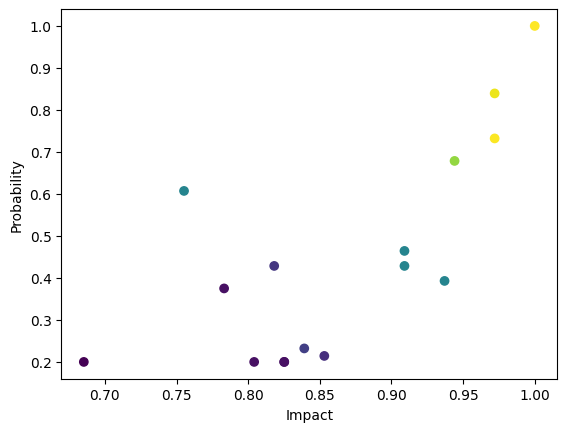

In [ ]:
def graphAllData(dataset):
  probability = dataset['likelihood_n'].to_list()
  impact = dataset['impact_n'].to_list()
  risk = dataset['risk'].to_list()

  plt.scatter(impact,probability,c=risk)
  plt.xlabel("Impact")
  plt.ylabel("Probability")
  plt.show()
graphAllData(dataset_with_risks)

In [ ]:
# 1. Input numeric values and use fuzzification route.
crispy_val = execFzzedRules(0.9, 0.2)
# Low valores entre 0,1 y 0,4
# Medium entre 0,2 y 0,8
# High entre 0,6 y 1
crispy_val

0.21666692592576164

## Matriz de riesgos según reglas difusas

In [ ]:
import plotly.express as px
row_1 = [1,2,3,4,4]
row_2 = [1,2,2,3,4]
row_3 = [1,1,2,3,4]
row_4 = [1,1,2,2,3]
row_5 = [1,1,1,2,2]

gross_data=[row_1, row_2, row_3, row_4, row_5]

fig = px.imshow(gross_data,

 labels=dict(x="Impact", y="Probability", color="Number of Risks"),
 x=['Low','Medium Low','Medium','Medium High','High'],
 y=['Very Likely','Likely','Medium Likelihood', 'Unlikely','Very Unlikely'],
 color_continuous_scale=["green","yellow", "red"]
 )

fig.update_xaxes(side="bottom")




fig.show()